/var/folders/m8/2_pc0xd963q98ds3db325g5h0000gn/T/ipykernel_17237/671706805.py:75: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(error_x_f[-1], error_y_f[-1], s=60, marker='x', color='red', label='End', edgecolor='black')


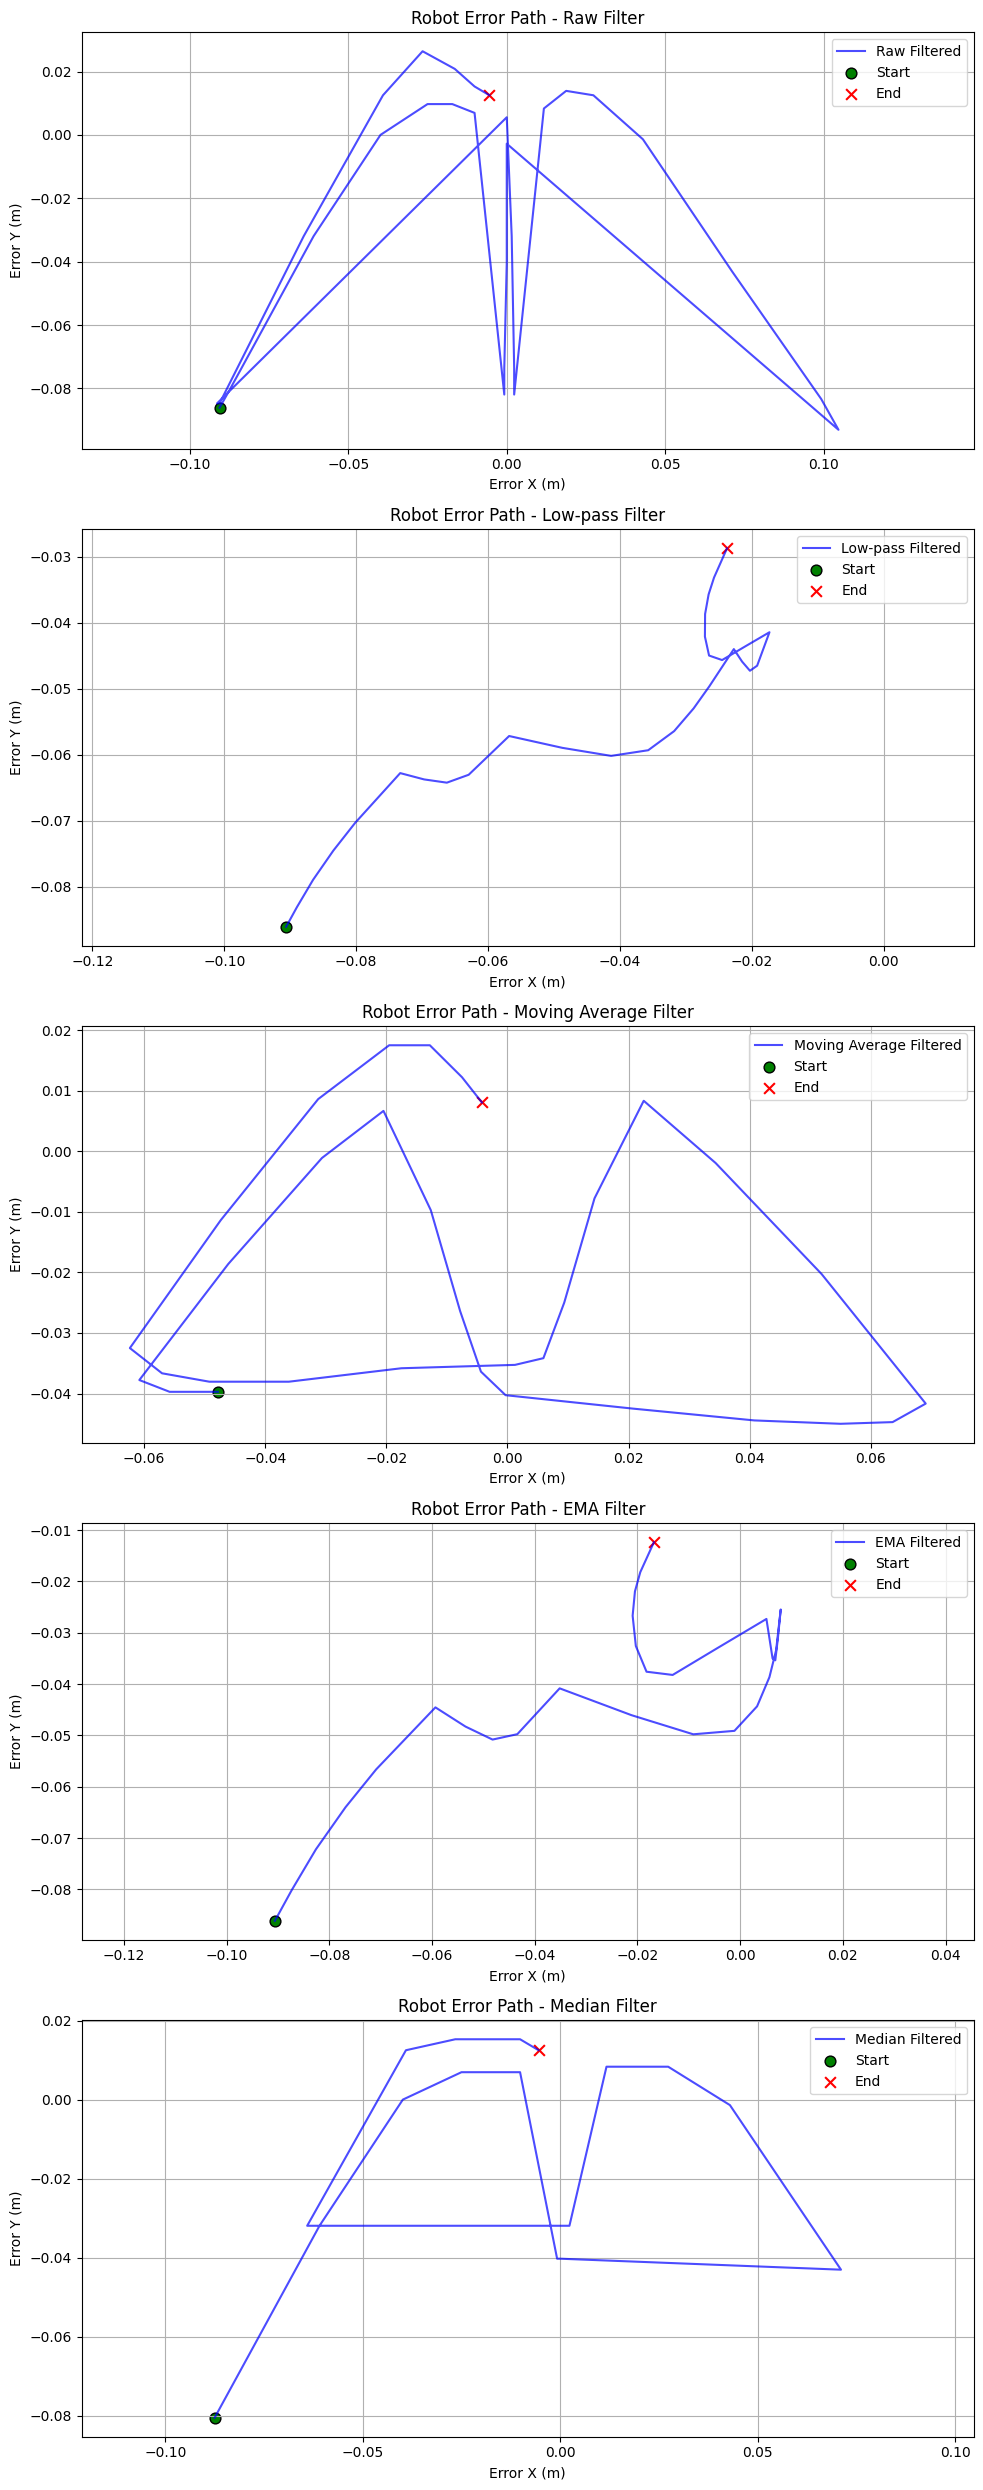

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

# ชื่อไฟล์ CSV ที่ต้องการนำมาวิเคราะห์
file_name = "/Users/faiijaran/robot/Robot_Module_2-1/J.Thanet/Lab02/data/rec_track_1415_P150_I0_D5.csv"

# === ฟังก์ชัน Low-Pass Filter (การกรองความถี่ต่ำ) ===
def low_pass_filter(data, alpha=0.05):
    filtered = np.zeros_like(data)
    filtered[0] = data[0]
    for i in range(1, len(data)):
        filtered[i] = alpha * data[i] + (1 - alpha) * filtered[i-1]
    return filtered

# === ฟิลเตอร์ Moving Average (ค่าเฉลี่ยเคลื่อนที่) ===
def moving_average_filter(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# === ฟิลเตอร์ Exponential Moving Average (EMA) ===
def ema_filter(data, alpha=0.1):
    ema = np.zeros_like(data)
    ema[0] = data[0]
    for i in range(1, len(data)):
        ema[i] = alpha * data[i] + (1 - alpha) * ema[i-1]
    return ema

# === ฟิลเตอร์ Median (ค่ามัธยฐาน) ===
def median_filter_custom(data, window_size=5):
    return median_filter(data, size=window_size)

# === ส่วนหลักของโปรแกรม ===
# อ่านไฟล์ CSV
try:
    df = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"Error: File '{file_name}' not found.")
    exit()

# ตรวจสอบว่าคอลัมน์ 'error_x' และ 'error_y' มีอยู่ในไฟล์หรือไม่
if 'error_x' not in df.columns or 'error_y' not in df.columns:
    print("Error: Required columns 'error_x' or 'error_y' not found in the CSV file.")
    exit()

# เตรียมข้อมูลดิบจากคอลัมน์ 'error_x' และ 'error_y'
error_x_raw = df['error_x'].fillna(0).values
error_y_raw = df['error_y'].fillna(0).values

# กำหนดฟิลเตอร์ที่จะใช้
filters = {
    'Raw': lambda x: x,
    'Low-pass': lambda x: low_pass_filter(x, alpha=0.05),
    'Moving Average': lambda x: moving_average_filter(x, window_size=5),
    'EMA': lambda x: ema_filter(x, alpha=0.1),
    'Median': lambda x: median_filter_custom(x, window_size=5),
}

# สร้าง subplot เพื่อแสดงผลของแต่ละฟิลเตอร์
fig, axs = plt.subplots(len(filters), 1, figsize=(10, 5 * len(filters)))

# วนลูปเพื่อนำแต่ละฟิลเตอร์ไปใช้และ plot กราฟ
for ax_idx, (filter_name, filter_func) in enumerate(filters.items()):
    ax = axs[ax_idx]
    
    # ใช้ฟิลเตอร์
    error_x_f = filter_func(error_x_raw)
    error_y_f = filter_func(error_y_raw)
    
    # Plot เส้นทาง
    ax.plot(error_x_f, error_y_f, label=f'{filter_name} Filtered', color='blue', alpha=0.7)
    
    # Plot จุดเริ่มต้นและจุดสิ้นสุด
    ax.scatter(error_x_f[0], error_y_f[0], s=60, marker='o', color='green', label='Start', edgecolor='black')
    ax.scatter(error_x_f[-1], error_y_f[-1], s=60, marker='x', color='red', label='End', edgecolor='black')
    
    ax.set_title(f'Robot Error Path - {filter_name} Filter')
    ax.set_xlabel('Error X (m)')
    ax.set_ylabel('Error Y (m)')
    ax.grid(True)
    ax.axis('equal') 
    ax.legend()

# ปรับ layout ของ subplot ให้เหมาะสม
plt.tight_layout()
# แสดงกราฟ
plt.show()